**Regresión Lineal**
######Regresión Lineal Simple


$$y = \beta_0 + \beta_1\cdot x $$
$$\hat{y_i} = b_0 + b_1 \cdot x_i + e_i $$
$$e_i = \hat{y_i} - y_i $$

In [ ]:
!pip install ggplot ## Instalo paquete ggplot, en windows hay que utilizar anaconda prompt?

     |████████████████████████████████| 2.2MB 2.8MB/s 


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [2]:
mtcars = pd.read_csv("https://raw.githubusercontent.com/joanby/estadistica-inferencial/master/datasets/mtcars.csv")

In [ ]:
mtcars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


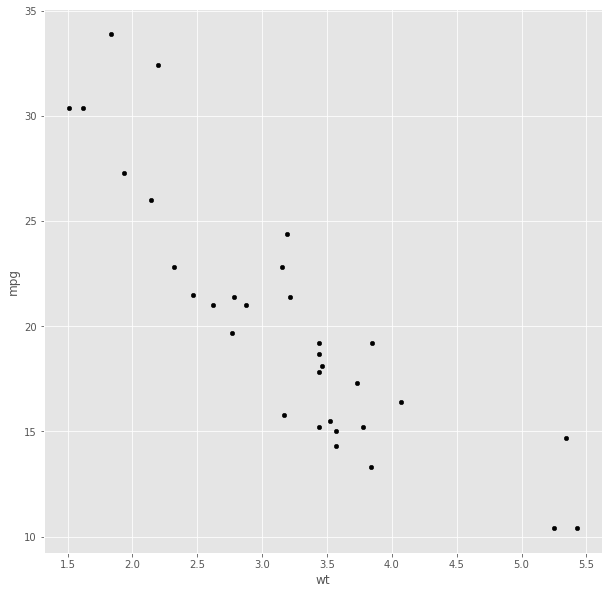

In [31]:
mtcars.plot(kind = "scatter" ,x ="wt", y="mpg", figsize = (10,10), color = "black") # scatter es para una nube de puntos
# Una hipótesis sería que el consumo de gasolina pudo recorrer menos millas cuanto más pesa el coche


In [30]:
from sklearn import linear_model # es funcion la utilziare para crear el modeo lineal

In [29]:
regression_model = linear_model.LinearRegression() # se inicializa vacío
regression_model.fit(X = pd.DataFrame(mtcars["wt"]),# x es el dataset como variable indepte, de mtcars me interesa el peso "wt" y este debe ir en formato dataframe
                     y = mtcars["mpg"] )  # el vector de prediccion no necesito que sea una matriz, no necesito construir un dato frame, me basta invocar a la columna de la matriz 
print(regression_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [28]:
print(regression_model.intercept_) # ordenada al origen
print(regression_model.coef_) # termino que acompaña a la variable x

19.241441756136698
[0.51289417]


$$ mpg= 37.28512616734204 - 5.34447157 \cdot wt $$

In [27]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), y = mtcars["mpg"]) # me da el factor R^2
## Me da 75.28 % , es decir el 75% de la varianza de los datos originales (de los variabilidad observada en el gráfico) es explicada por el modelo.

-0.16965755913031244

In [26]:
train_prediction = regression_model.predict( X = pd.DataFrame(mtcars["wt"])) # prediccioens para el consumo de coche según el modelo
print(train_prediction)

[20.58522448 20.71601249 20.43135623 20.89039651 21.00579769 21.01605558
 21.07247394 20.87757415 20.85705838 21.00579769 21.00579769 21.32892102
 21.154537   21.18018171 21.93413614 22.02337972 21.98286108 20.36980893
 20.06976584 20.18260255 20.50572588 21.04682923 21.00323322 21.21095536
 21.21351983 20.23389197 20.33903528 20.01745063 20.86731627 20.6621586
 21.07247394 20.66728754]


In [25]:
residuals = mtcars["mpg"] - train_prediction
print(residuals)
residuals.describe() # para ver la distribución de esos residuos

0    -2.282611
1    -0.919770
2    -2.085952
3     1.297350
4    -0.200144
5    -0.693255
6    -3.905363
7     4.163738
8     2.349959
9     0.299856
10   -1.100144
11    0.866873
12   -0.050247
13   -1.883024
14    1.173350
15    2.103288
16    5.981074
17    6.872711
18    1.746195
19    6.421979
20   -2.611004
21   -2.972586
22   -3.726866
23   -3.462355
24    2.464367
25    0.356426
26    0.152043
27    1.201059
28   -4.543151
29   -2.780940
30   -3.205363
31   -1.027495
Name: mpg, dtype: float64


count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [24]:
SSE = (residuals**2).sum()
SST = ((mtcars["mpg"]- mtcars["mpg"].mean())**2).sum()
1-(SSE/SST) ## con esta fómrula también podemos hallar el R^2

0.7528327936582646

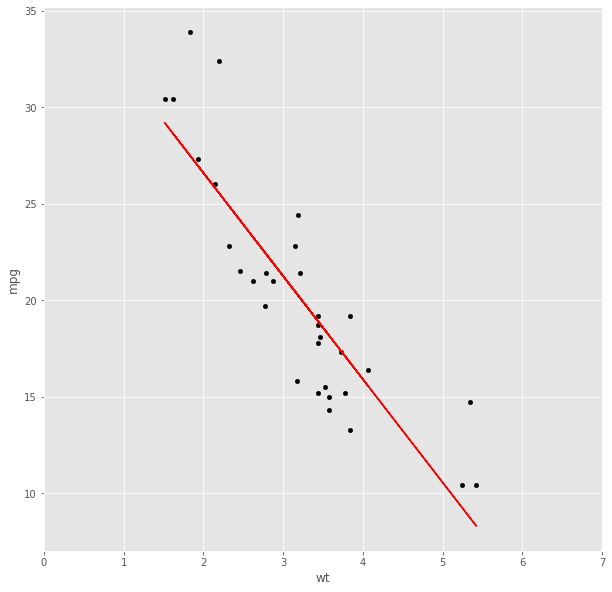

In [23]:
mtcars.plot(kind = "scatter" ,x ="wt", y="mpg", figsize = (10,10), color = "black", xlim = (0,7)) # scatter es para una nube de puntos, xlim = para que el eje x sea mas grande
plt.plot(mtcars["wt"], train_prediction, color = "red") # para pintarle la recta de regresión lineal, en el eje de la y va la recta de predicción, el tipo de gráfico por defecto es una linea


**Análisis de Residuos**


((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458974, -8.074143041746

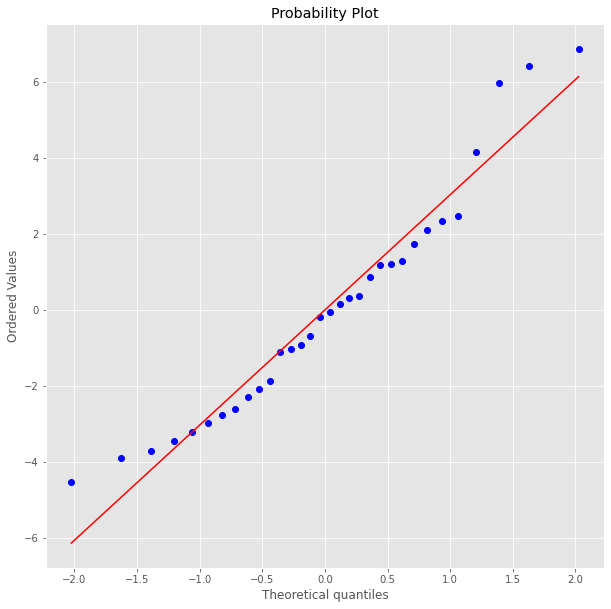

In [22]:
plt.figure(figsize=(10,10)) # establecemos el tamaño de la figura
stats.probplot(residuals, dist = "norm", plot = plt) # pintamos en el eje x  los "residuals", en el eje de la Y el equivalente a la dist Norm, y el "plt" es para que aproveche el figsize establecido en la linea anterior.

## Me muestro los residuos ordenanados desde el más pequeño al más grande (El de la normal, si los datos estuvieran según una normal)
## luego abajo como se distribuyen realmente mis datos.
# 
# La tendencia es colocarse sobre la recta, aunque en los límites se sale un poco de que sea "lineal", entonces hay que ver de ajustarlo a algún polinomio.

$$RMSE = \sqrt{\frac{\sum_{i=1}^n (y_i = \hat{y_i})^2}{n}}$$

In [21]:
from sklearn.metrics import mean_squared_error 
RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.05
print(RMSE) # Root Mean Square Error

1.1142172377820003


## Outliers

In [19]:
mtcars_subset = mtcars[["mpg", "wt"]]
supercar = pd.DataFrame({"mpg":50, "wt":10}, index = ["super"])
new_cars = mtcars_subset.append(supercar)


In [20]:
regression_model = linear_model.LinearRegression() # definimos modelo de regresión vacío
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])
train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

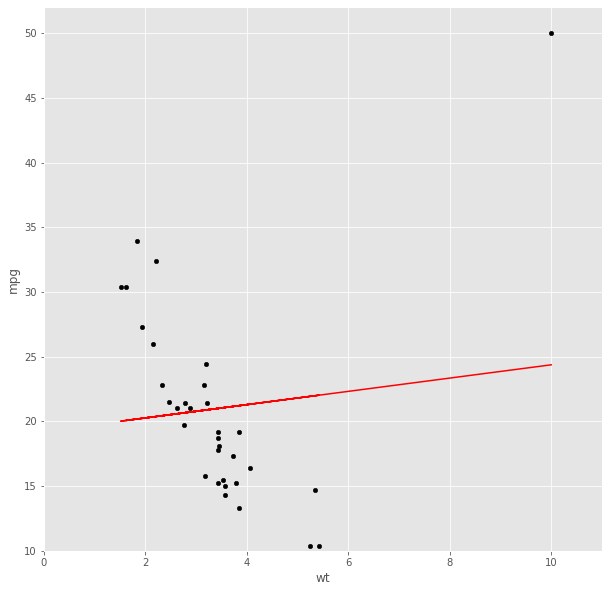

In [18]:
new_cars.plot(kind="scatter", x = "wt", y = "mpg", figsize = (10,10), color = "black", xlim = (0, 11), ylim = (10, 52))
plt.plot(new_cars["wt"], train_prediction2, color = "red") # Vemos como la recta de regresión quedó distorsionada por el outlier


### Regresión Polinómica 


<$$ \hat{y} = b_0 + b_1\cdot x + b_2 \cdot x^2  + b_3 \cdot x^3 +\cdots + b_m \cdot x^m $$ 

In [17]:
poly_model = linear_model.LinearRegression()
predictors = pd.DataFrame([mtcars["wt"], mtcars["wt"]**2]).T # El t para transponerlo y así son columnas
poly_model.fit(X = predictors , y = mtcars["mpg"]) # se entrena el modeo polinómico

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(poly_model.intercept_)
print(poly_model.coef_)

49.9308109494518
[-13.38033708   1.17108689]


$$mpg = 49.9308109494518 - 13.38033708 \cdot wt + 1.17108689 \cdot wt^2 $$

In [16]:
poly_model.score(X = predictors , y =mtcars["mpg"]) # El R^2 

0.8190613581384096

In [15]:
poly_range = np.arange(0,6,0.1)
poly_regr = pd.DataFrame([poly_range, poly_range**2]).T
y_regr = poly_model.predict( X = poly_regr)


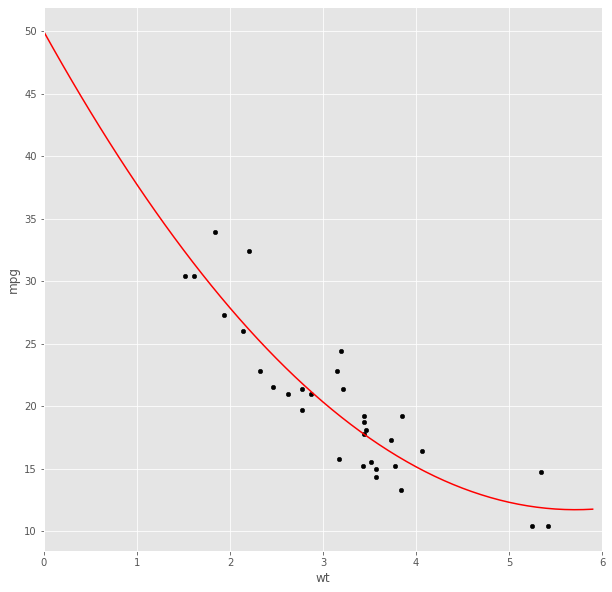

In [14]:
mtcars.plot(kind = "scatter",  x = "wt", y = "mpg", figsize = (10,10), color = "black", xlim =(0,6))
plt.plot(poly_range, y_regr, color = "red") # esto es para pintar la curva

In [32]:
## Medimos el error cuadrático medio
preds = poly_model.predict(X = predictors) # predicimos con los mismos datos de partida
mean_squared_error(preds, mtcars["mpg"]) ** 0.5 # pedimos el mean squared error comparando los originales contra las predicciones
# la raiz edel error cuadrático medio es menor y el R^2 es mayor, entonces parecería que es mejor este modelo polinómico.

2.523300472461078

## Modelo Polinómico de Orden Superior

In [33]:
poly_model = linear_model.LinearRegression()

predictors = pd.DataFrame([mtcars["wt"],mtcars["wt"]**2,mtcars["wt"]**3,mtcars["wt"]**4,mtcars["wt"]**5,mtcars["wt"]**6,
                          mtcars["wt"]**7,mtcars["wt"]**8,mtcars["wt"]**9,mtcars["wt"]**10]).T

poly_model.fit(X = predictors , y= mtcars["mpg"]) ## Ajustamos el Modelo , utilizando como variables indeptes a "predictors" y Dependientea los mpg


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(poly_model.intercept_)
print(poly_model.coef_)

-14921.121015416411
[ 6.45813588e+04 -1.20086135e+05  1.26931931e+05 -8.46598468e+04
  3.73155204e+04 -1.10334757e+04  2.16590407e+03 -2.70730547e+02
  1.94974164e+01 -6.15515442e-01]


In [35]:
poly_model.score(X = predictors, y = mtcars["mpg"])

0.8702106581645679

In [38]:
x_range = np.arange(1.5,5.45,0.01)
poly_reg = pd.DataFrame([x_range, x_range**2,x_range**3,x_range**4,x_range**5,
                         x_range**6,x_range**7,x_range**8,x_range**9,x_range**10]).T
y_pred = poly_model.predict(X=poly_reg)

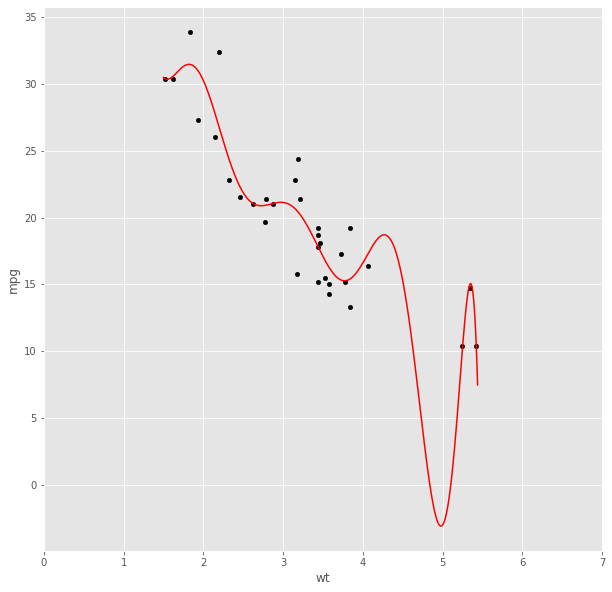

In [39]:
mtcars.plot(kind = "scatter", x="wt", y="mpg", figsize=(10,10),color = "black", xlim =(0,7))
plt.plot(x_range, y_pred, color = "red")

In [40]:
preds = poly_model.predict(X = predictors)
mean_squared_error(preds, mtcars["mpg"])**0.5

2.1370900435907023

# Regresión Lineal Múltiple

In [42]:
multi_reg_model = linear_model.LinearRegression()
multi_reg_model.fit(X = mtcars.loc[:, ["wt", "hp"]],
                    y = mtcars["mpg"])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(multi_reg_model.intercept_)
print(multi_reg_model.coef_)

37.22727011644721
[-3.87783074 -0.03177295]


$$ mpg = 37.22727011644721 - 3.87783074\cdot wt - 0.03177295\cdot hp $$

In [48]:
multi_reg_model.score(X = mtcars.loc[:,["wt","hp"]], y = mtcars["mpg"])  # R cuadrado

0.8267854518827915

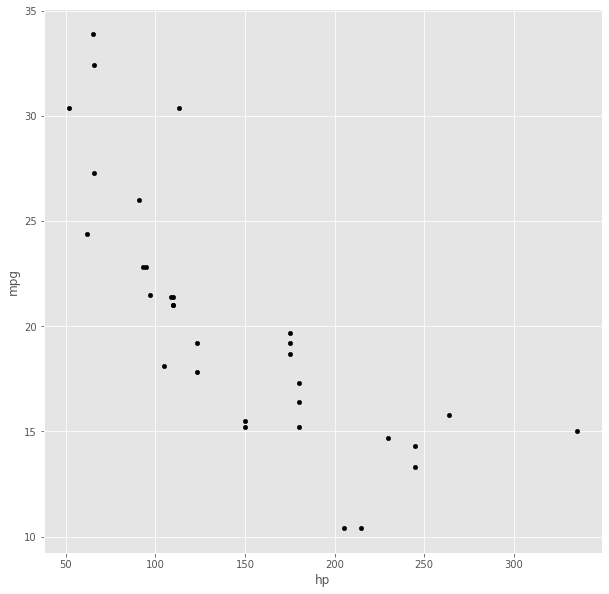

In [49]:
mtcars.plot(kind = "scatter", x ="hp", y = "mpg", figsize=(10,10), color = "black")

In [50]:
preds = multi_reg_model.predict(X = mtcars.loc[:,["wt","hp"]])
mean_squared_error(preds, mtcars["mpg"]) ** 0.5

2.4688544581790994

In [51]:
multi_reg_model = linear_model.LinearRegression()

poly_reg = pd.DataFrame([mtcars["wt"],mtcars["wt"]**2,mtcars["hp"], mtcars["hp"]**2]).T

multi_reg_model.fit(X = poly_reg, y= mtcars["mpg"])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
multi_reg_model.score(X = poly_reg, y =mtcars["mpg"]) # R cuadrado

0.8907279549670641

In [55]:
mean_squared_error(multi_reg_model.predict(X = poly_reg), mtcars["mpg"])**0.5  # Raiz del error cuadrado medio

1.9609108134176991